In [2]:
#Импорт всех необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [8]:
#Отделение категориальных признаков от некатегориальных данных
df = pd.read_csv('../DataSets/infarct.csv')
cat_cols = ['sex', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
target_col = ['output']

In [9]:
#Вывод 5 первых колонок 
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
#Проверка наличия отсутствующих данных
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

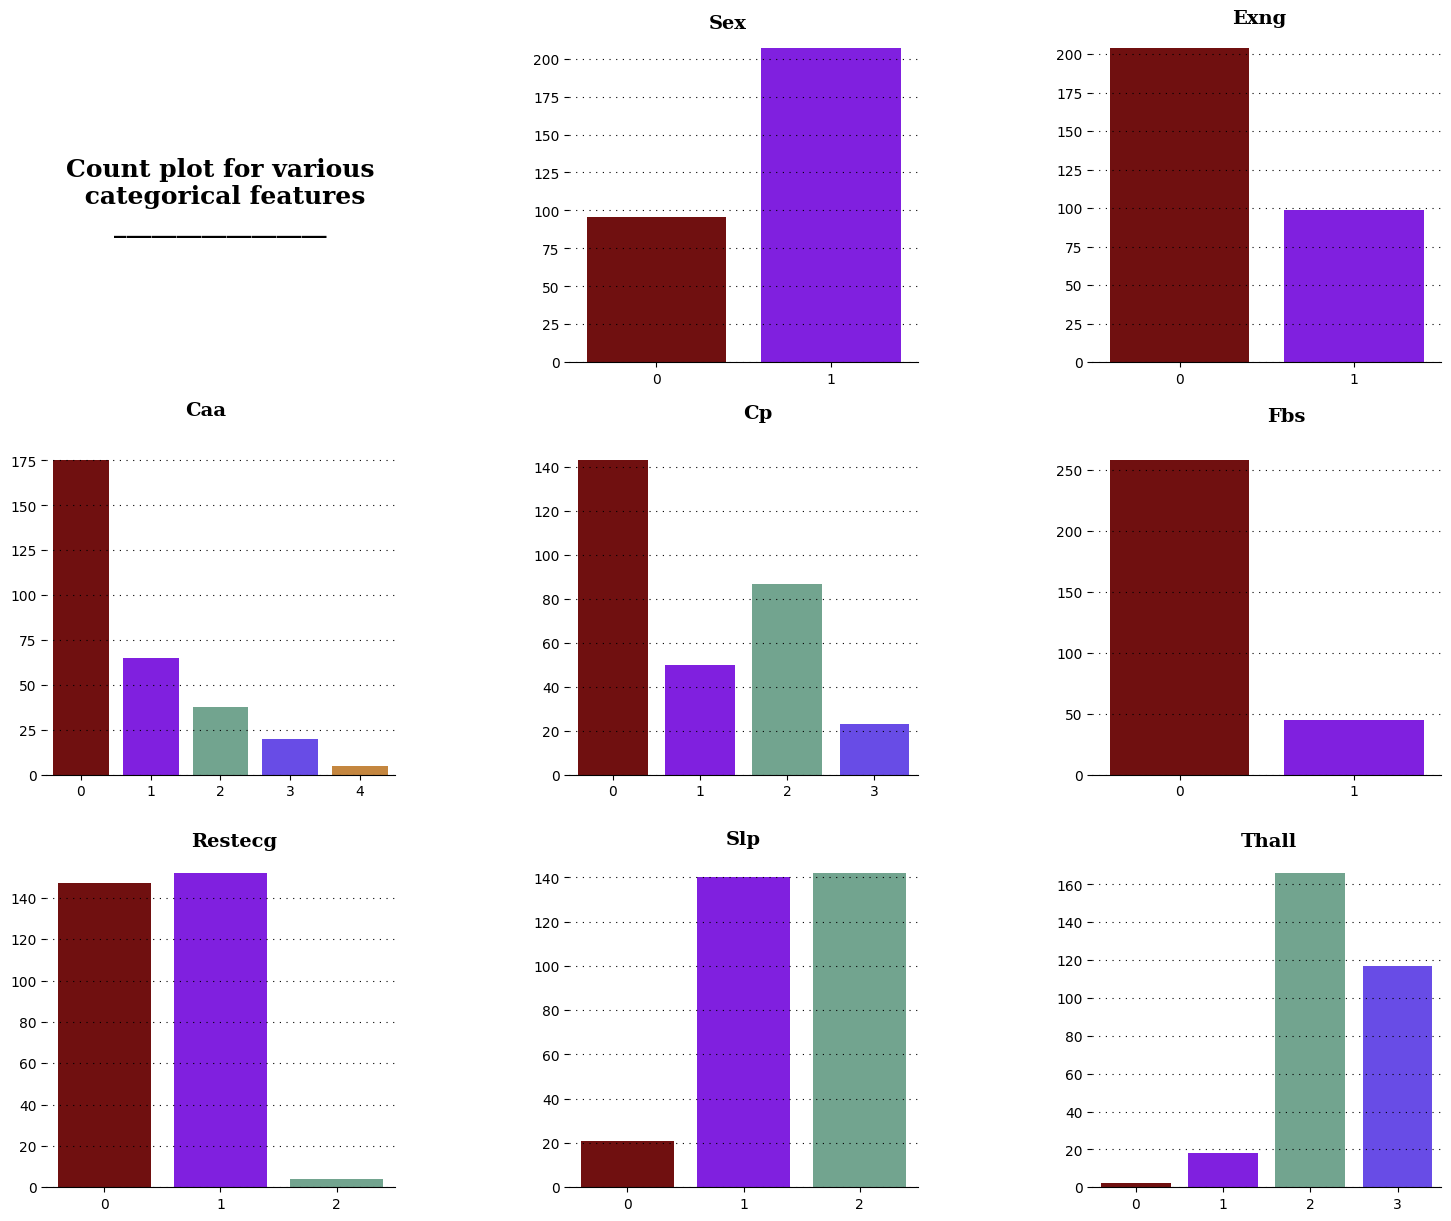

In [11]:
# Count plot-графики категориальных признаков
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

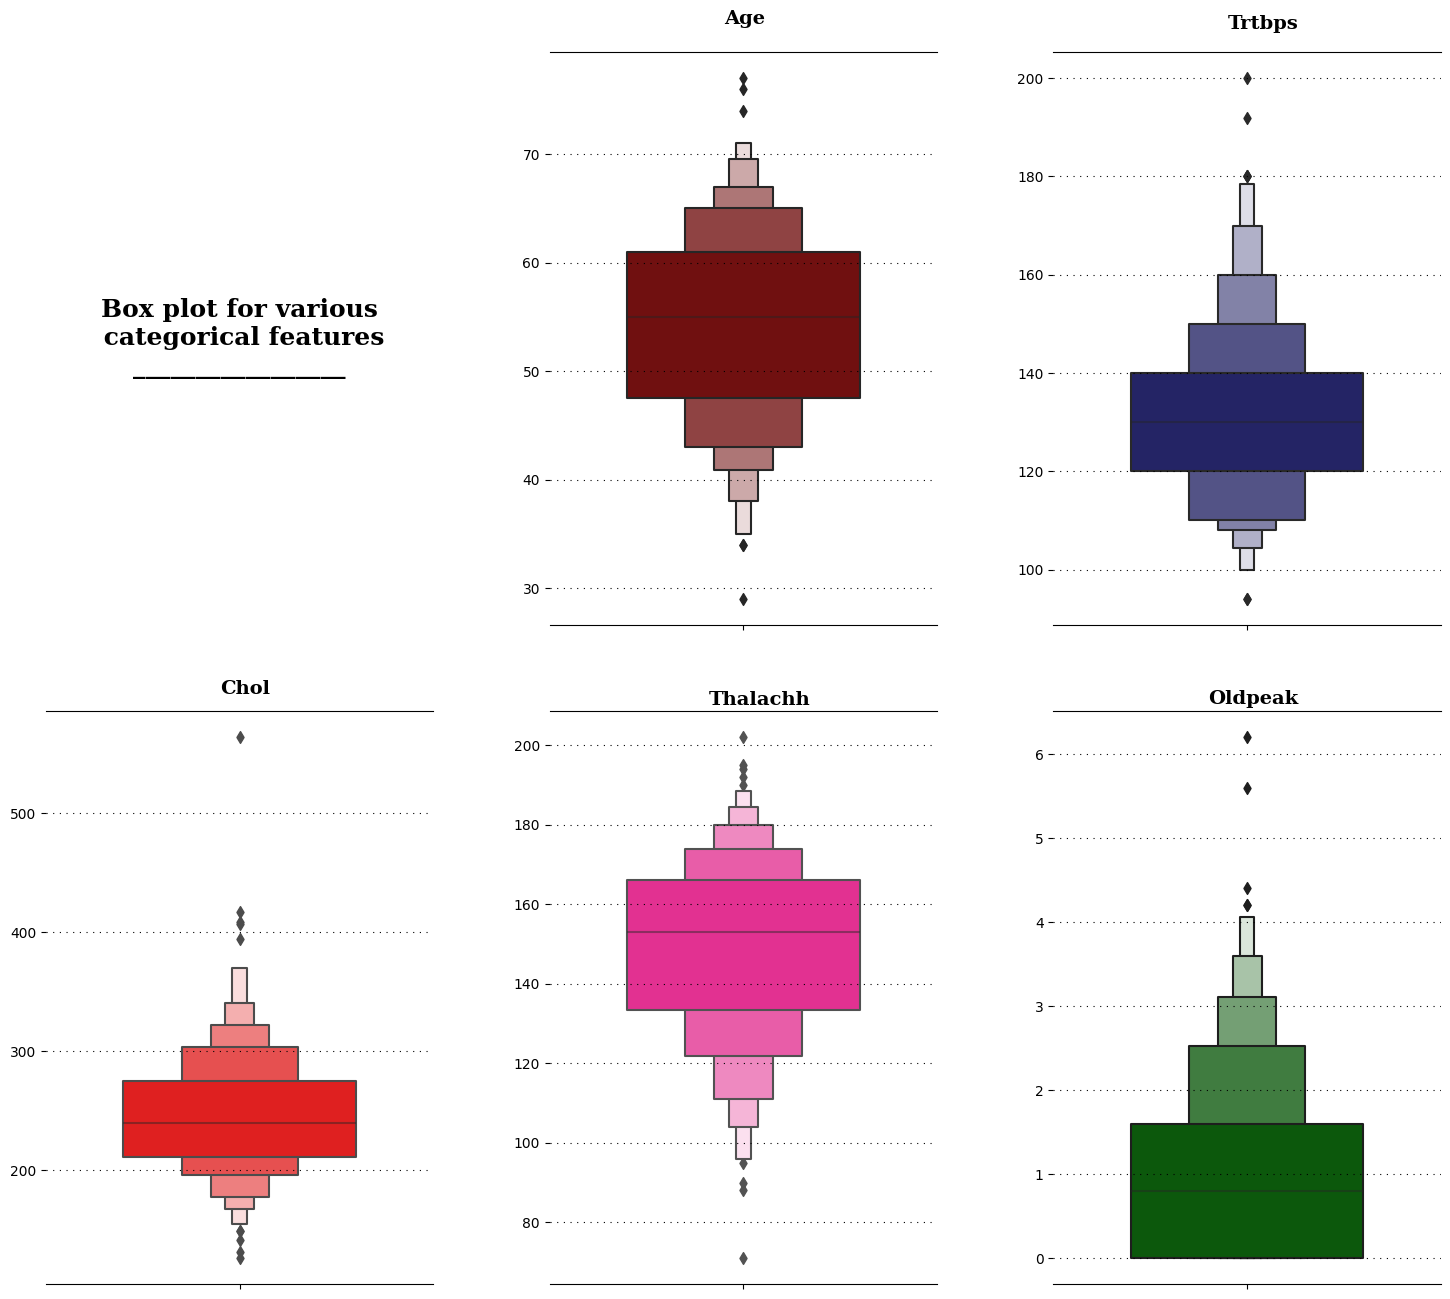

In [12]:
# Box графики некатегориальных данных
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)


# Заголовок для box-графиков
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

#Age
ax1.text(-0.05, 82, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'] ,palette=color_palette, width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")


# Trtbps 
ax2.text(-0.05, 210, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'] ,palette=['#191970'], width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

#Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'] ,palette=['#FF0000'], width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

#Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'] ,palette=['#FF1493'], width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

#Oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'] ,palette=['#006400'], width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

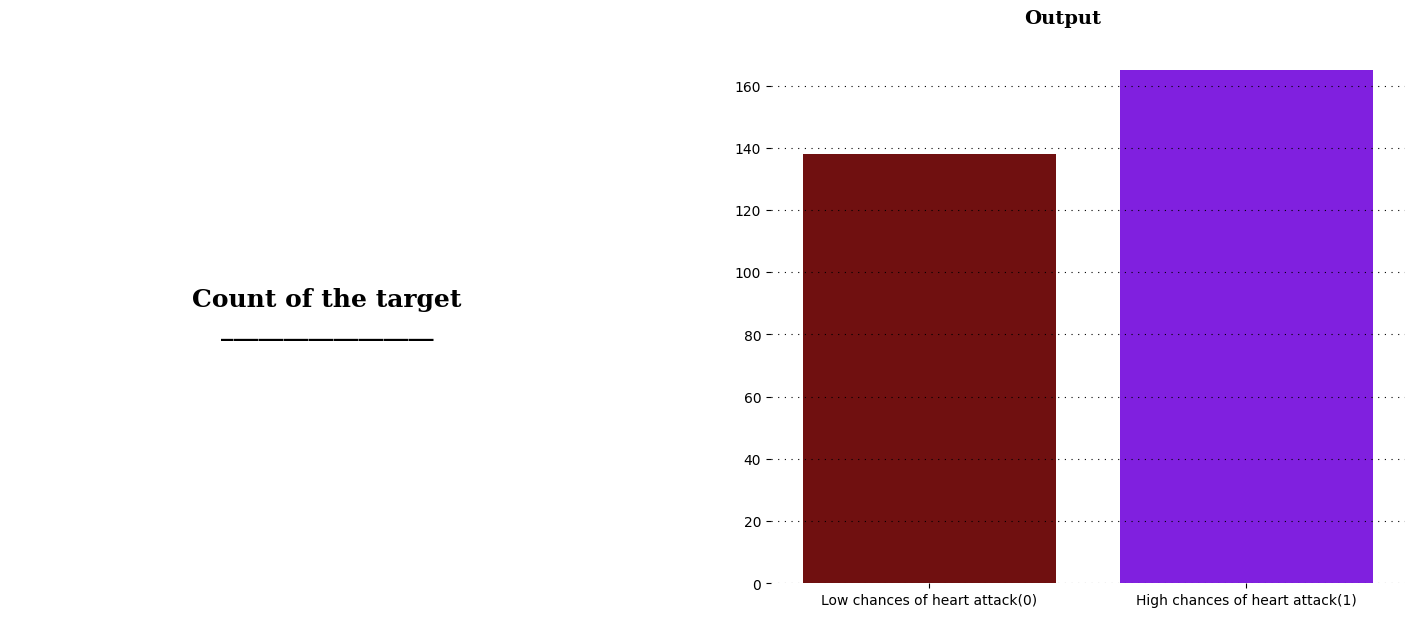

In [13]:
#Count plot-график для целевого показателя
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.2, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

ax0.text(0.5,0.5,
         'Count of the target\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax1.text(0.3, 180, 'Output', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='output', palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(['Low chances of heart attack(0)', 'High chances of heart attack(1)'])

for s in ['right', 'left', 'bottom', 'top', 'bottom']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

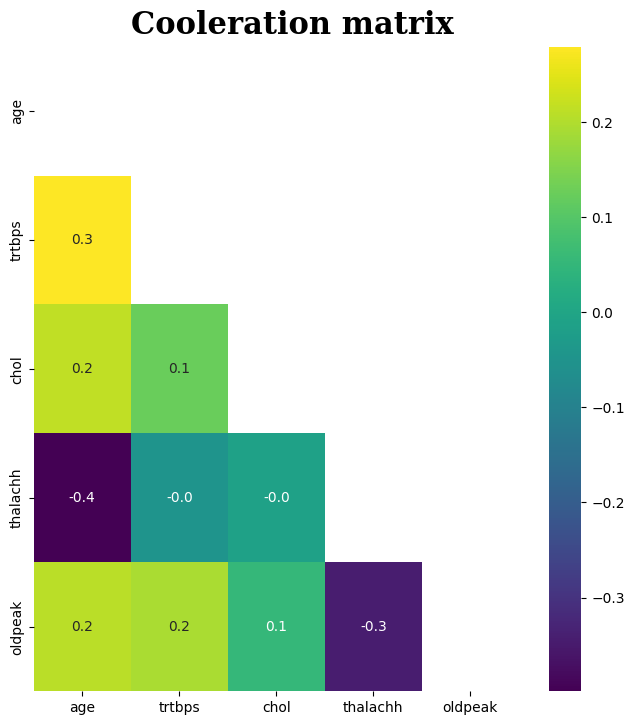

In [14]:
#Матрица корреляции некатегориальных значений
df_corr = df[con_cols].corr().transpose()

fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

mask = np.triu(np.ones_like(df_corr))
ax0.text(1, -0.1, 'Cooleration matrix', fontsize=22, fontweight='bold', fontfamily='serif', color='#000000')
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr, mask=mask, fmt='.1f', annot=True, cmap='viridis')
plt.show()

<Figure size 1800x1800 with 0 Axes>

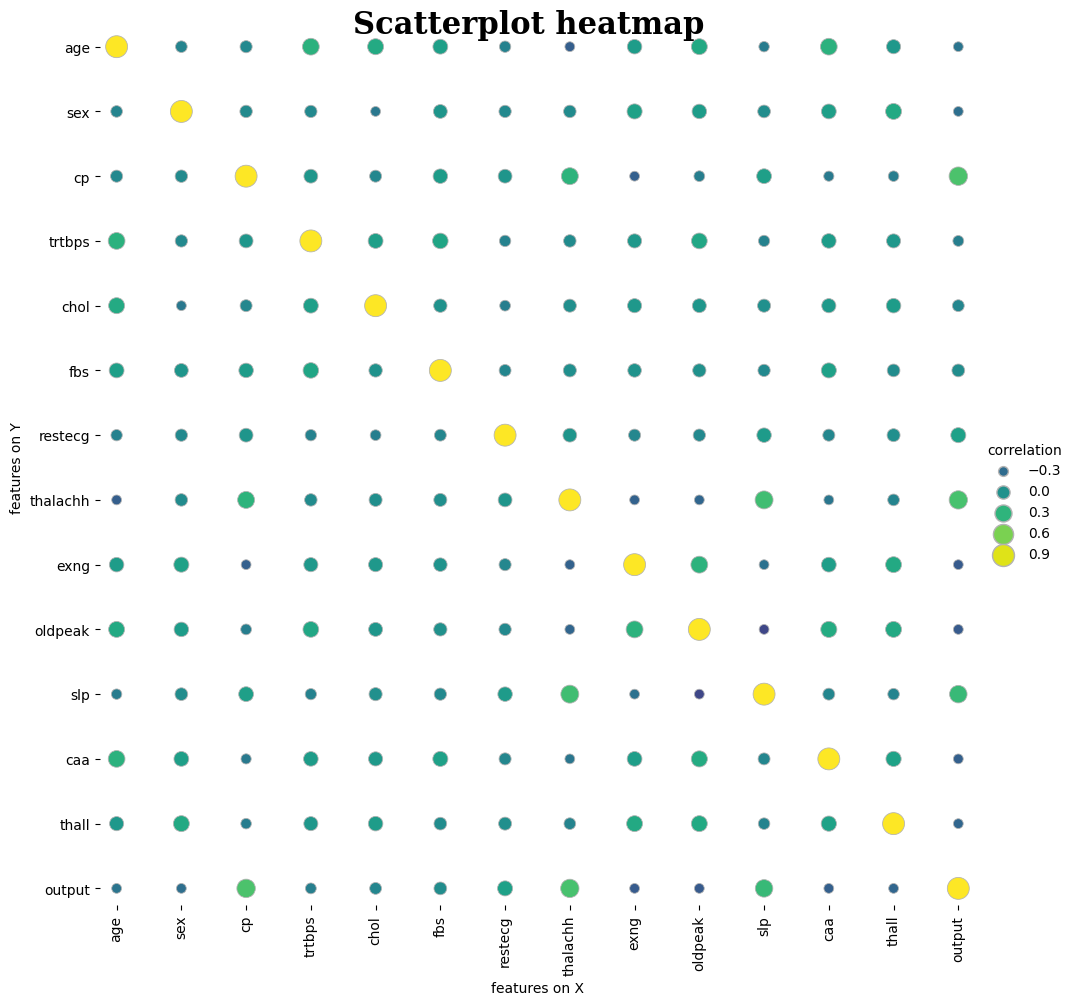

In [15]:
#Тепловая диаграмм рассеяния
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.3, hspace=0.15)
corr_mat = df.corr().stack().reset_index(name='correlation')
g = sns.relplot(data=corr_mat, x='level_0', y='level_1', hue='correlation', size='correlation',
                palette='viridis', hue_norm=(-1, 1), edgecolor='.7',
                height=10, sizes=(50, 250), size_norm=(-.2, .8))
g.set(xlabel='features on X', ylabel='features on Y', aspect='equal')
g.fig.suptitle('Scatterplot heatmap', fontsize=22, fontweight='bold', fontfamily='serif', color='#000000')
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

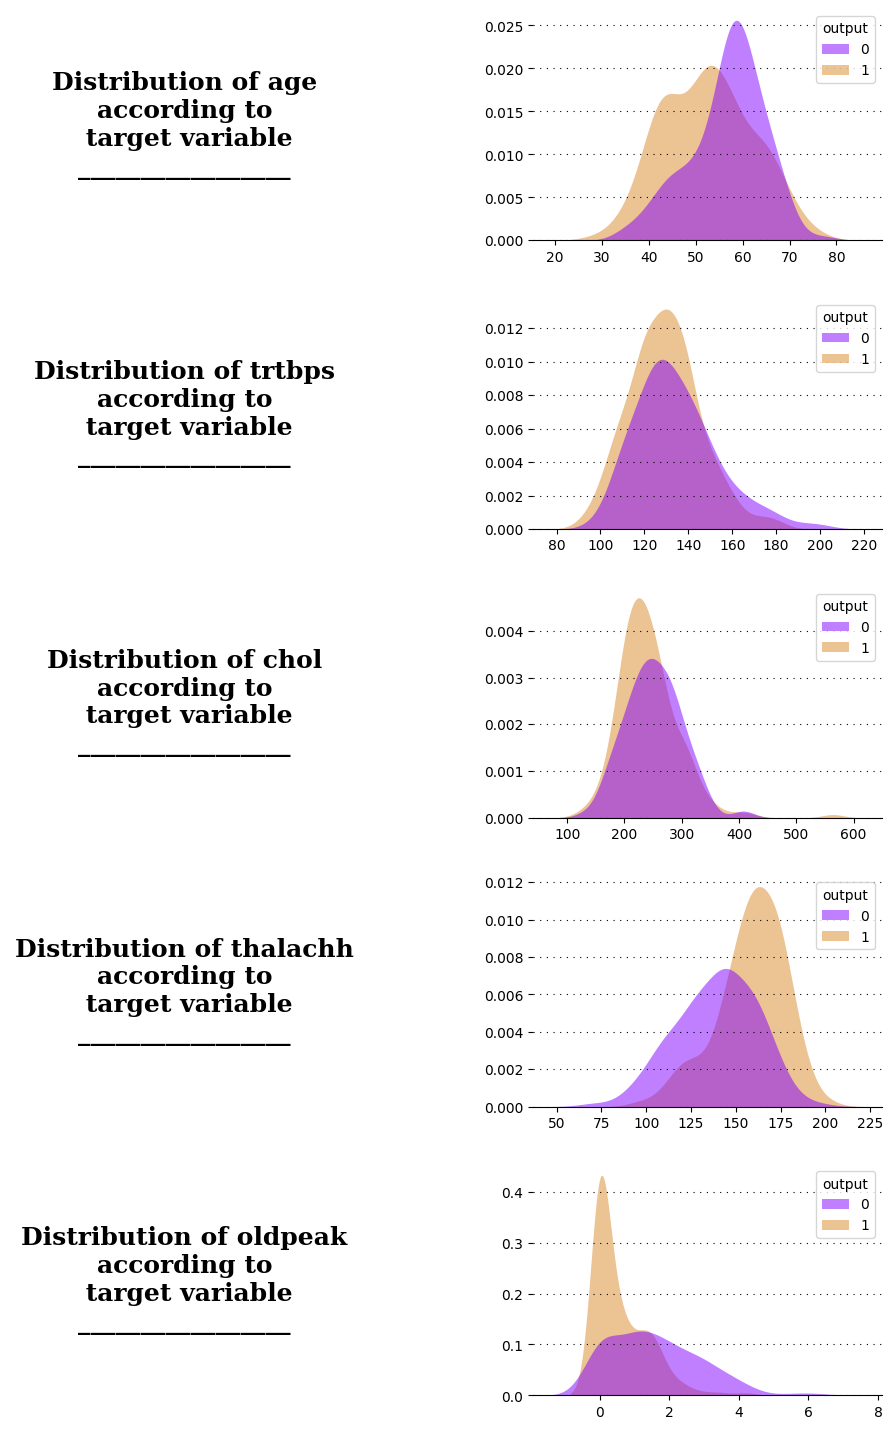

In [16]:
#Распределение категориальных данных в соответствии с целевым показателем
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

#Заголовок age
ax0.text(0.5,0.5,
         'Distribution of age\naccording to\n target variable\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax0.spines['bottom'].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
#Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age', hue='output', fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

#Заголовок TrTbps
ax2.text(0.5,0.5,
         'Distribution of trtbps\naccording to\n target variable\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax2.spines['bottom'].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
#TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps', hue='output', fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

#Заголовок Chol
ax4.text(0.5,0.5,
         'Distribution of chol\naccording to\n target variable\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax4.spines['bottom'].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
#Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol', hue='output', fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

#Заголовок Thalachh
ax6.text(0.5,0.5,
         'Distribution of thalachh\naccording to\n target variable\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax6.spines['bottom'].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)
#Chol
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh', hue='output', fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

#Заголовок Oldpeak
ax8.text(0.5,0.5,
         'Distribution of oldpeak\naccording to\n target variable\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax8.spines['bottom'].set_visible(False)
ax8.tick_params(left=False, bottom=False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
#Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak', hue='output', fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

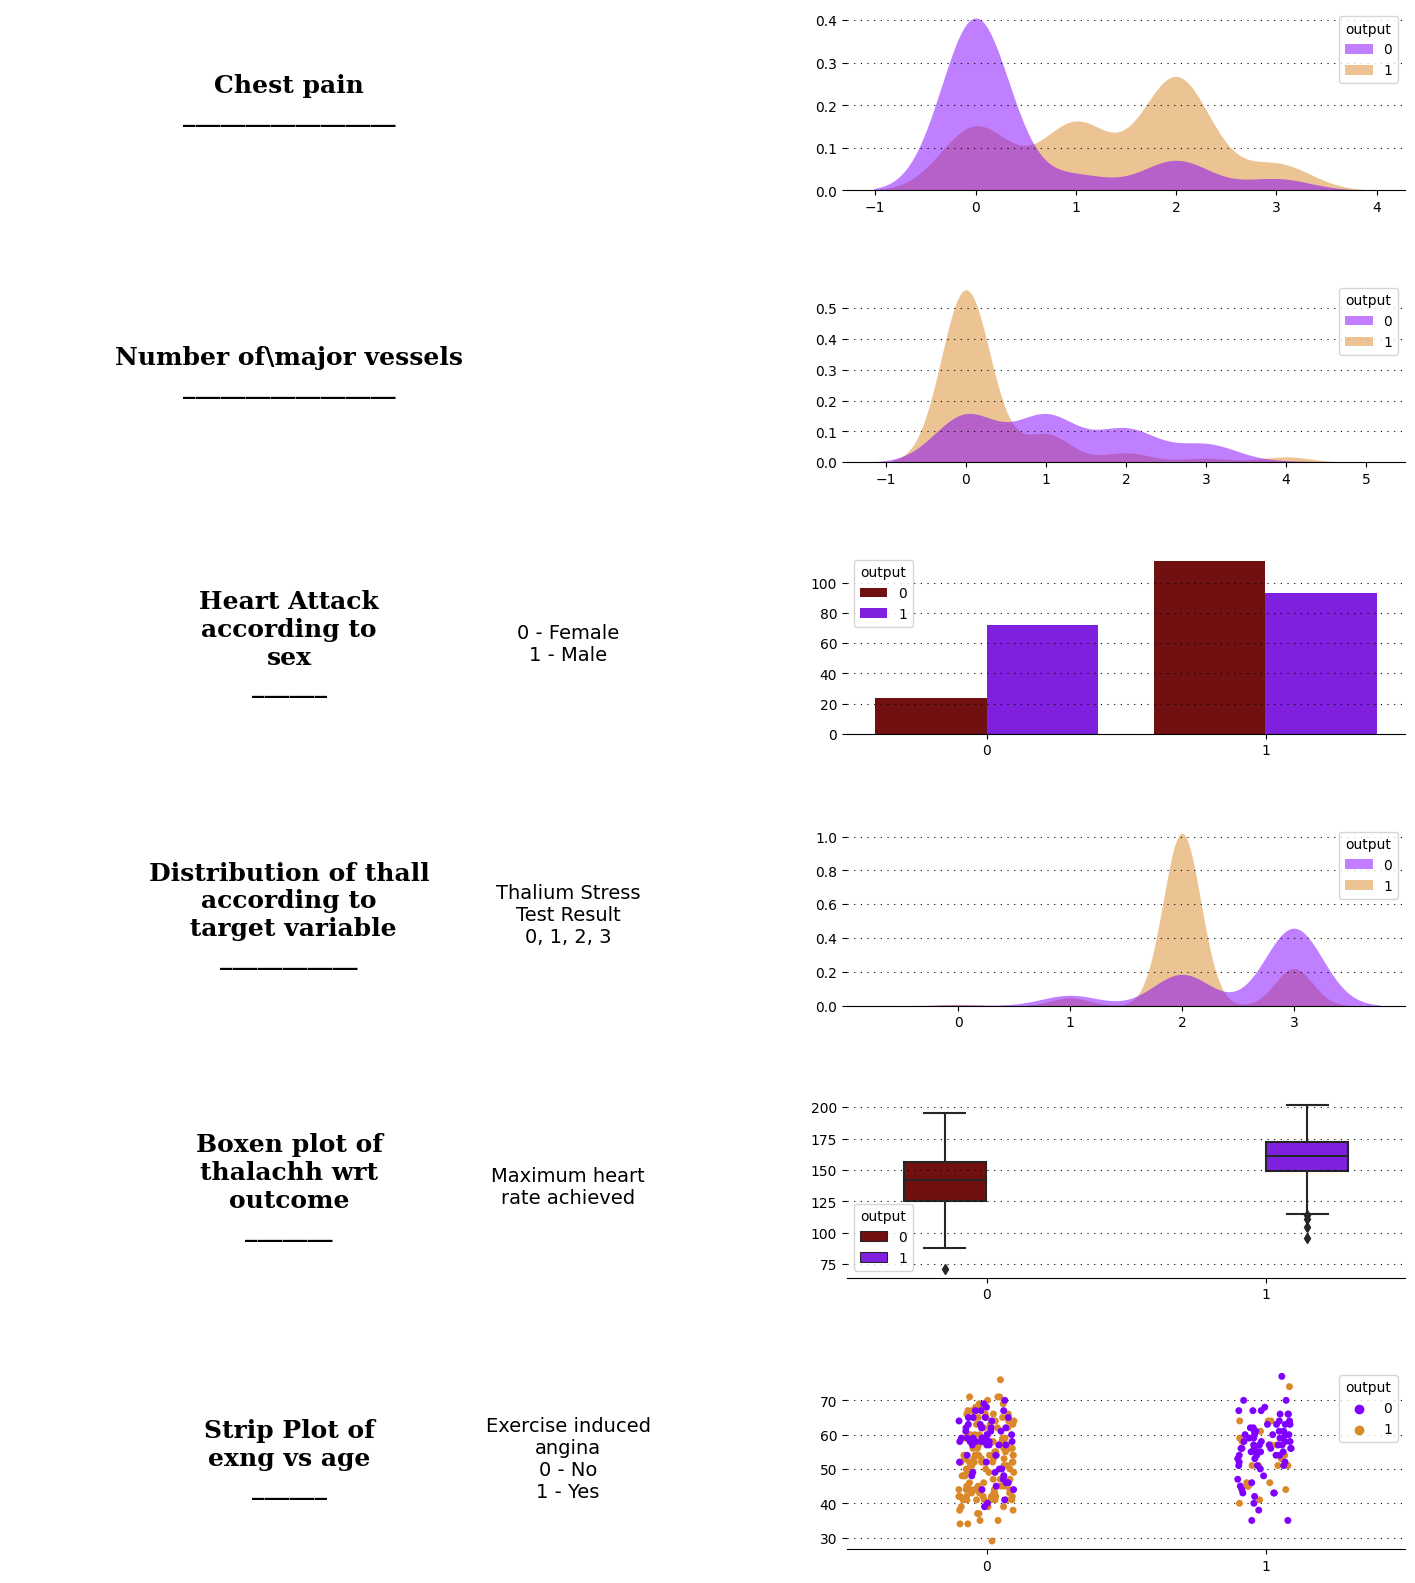

In [17]:
#Другие графики соотношений, выглядящие интуитивно
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

#Заголовок Cp
ax0.text(0.5,0.5,
         'Chest pain\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax0.spines['bottom'].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
#cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp', hue='output', fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel('')
ax1.set_ylabel('')

#Заголовок caa
ax2.text(0.5,0.5,
         'Number of\major vessels\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax2.spines['bottom'].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
#Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa', hue='output', fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel('')
ax3.set_ylabel('')

#Заголовок sex
ax4.text(0.5,0.5,
         'Heart Attack\naccording to\nsex\n______',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14)
ax4.spines['bottom'].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
#Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex', hue='output', palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

#Заголовок thall
ax6.text(0.5,0.5,
         'Distribution of thall\naccording to\n target variable\n___________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines['bottom'].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)
#Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall', hue='output', fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel('')
ax7.set_ylabel('')

#Заголовок thalachh
ax8.text(0.5,0.5,
         'Boxen plot of\nthalachh wrt\noutcome\n_______',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax8.spines['bottom'].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)
#Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax9, data=df, x='output', y='thalachh', hue='output', palette=color_palette, width=0.6)
ax9.set_xlabel('')
ax9.set_ylabel('')

#Заголовок exng
ax10.text(0.5,0.5,
         'Strip Plot of\nexng vs age\n______',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines['bottom'].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)
#Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax11.set_xlabel("")
ax11.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

In [18]:
#Prediction
#Создание копии df
df1 = df
#Преобразование категориальных столбцов
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

In [19]:
df1.head()

,age,cp,trtbps,chol,thalachh,oldpeak,output,sex_1,fbs_1,restecg_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,3,145,233,150,2.3,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37,2,130,250,187,3.5,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,41,1,130,204,172,1.4,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0


In [20]:
#Дифференция target и категориальных данных
X = df1.drop(['output'], axis=1)
y = df1[['output']]

In [21]:
#Инициализация функции масштабирования
scaler = RobustScaler()
#Масштабирование некатегориальных данных
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,age,cp,trtbps,chol,thalachh,oldpeak,sex_1,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.592593,3,0.75,-0.110236,-0.092308,0.9375,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.333333,2,0.00,0.157480,1.046154,1.6875,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.037037,1,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.074074,1,-0.50,-0.062992,0.769231,0.0000,1,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0.148148,0,-0.50,1.795276,0.307692,-0.1250,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [22]:
#Train и test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Linear Classifier
#Инициализация и настройка параметров
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train.values.ravel())
#Прогнозирование
y_pred = clf.predict(X_test)
#Результат
print('The best score of SVM is:', accuracy_score(y_test, y_pred))

The best score of SVM is: 0.8688524590163934


In [24]:
#Tuning parametr SVC
#Инициализация
svm = SVC()
#Настройка параметров
parametrs = {'C':np.arange(1, 10, 1), 'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
#Поиск наиболее результативных параметров
searcher = GridSearchCV(svm, parametrs)
searcher.fit(X_train, y_train.values.ravel())
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)
#Прогнозирование
y_pred = searcher.predict(X_test)
#Результат
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 2, 'gamma': 0.1}
The best score is   : 0.8509353741496598
The test accuracy score of SVM after hyper-parameter tuning is  0.8688524590163934


In [25]:
#Logistic regression
#Инициализация
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
#Вычисление вероятностей
y_pred_proba = logreg.predict_proba(X_test)
#Поиск предсказанных значений
y_pred = np.argmax(y_pred_proba, axis=1)
#Результат
print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistic Regression is  0.8852459016393442


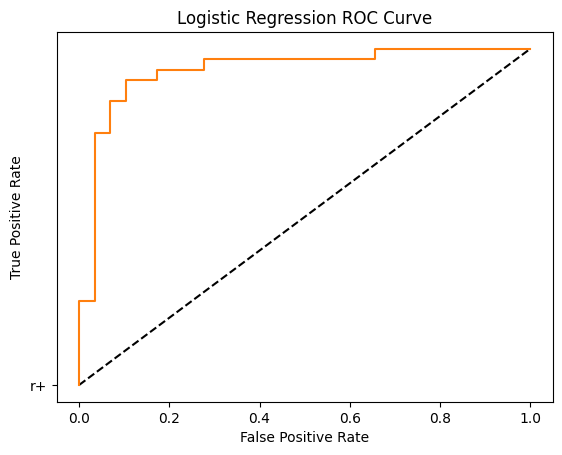

In [26]:
#Roc Curve
#Вычисление вероятностей
y_pred_prob = logreg.predict_proba(X_test)[:,1]
#Инициализация
fpr,tpr,threshols = roc_curve(y_test,y_pred_prob)
#Результат
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [27]:
#Desicion Tree
#Инициализация
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train.values.ravel())
#Прогнозирование
y_pred = dt.predict(X_test)
#Результат
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


In [28]:
#Random Forest
#Инициализация
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())
#Прогнозирование
y_pred = rf.predict(X_test)
#Результат
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.8688524590163934


In [29]:
#Graddient boosting classifier
#Инициализация и настройка
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1, subsample=0.8, max_features=0.2, random_state=42)
gbt.fit(X_train, y_train.values.ravel())
#Прогнозирование
y_pred = gbt.predict(X_test)
#Результат
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934
